# The Singular Value Decomposition

In [2]:
# for conversion to PDF use these settings
# %matplotlib inline
# qr_setting = 'url'
# qrviz_setting = 'show'
#
# for lecture use notebook
%matplotlib notebook
qr_setting = None
qrviz_setting = 'save'
#
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
reload(sl)
reload(ut);

Today we'll study the most useful decomposition in applied Linear Algebra.

Pretty exciting, eh?

>The Singular Value Decomposition is the __“Swiss Army Knife”__ and the __“Rolls Royce”__ of matrix decompositions.

-- Diane O'Leary

## The Singular Value Decomposition

Note that the domain of $A\mathbf{x}$ is $\R^n$ and the range of $A\mathbf{x}$ is $\col\ A.$

So what we have proved is that the eigenvectors of $A^TA$ are rather special.

We have proved that the set $\{\mathbf{v}_i\}$ is an orthogonal basis for the domain of $A\mathbf{x}$, and $\{A\mathbf{v}_i\}$ is an orthogonal basis for the range of $A\mathbf{x}$.

Now we can define the SVD.

__Theorem.__ Let $A$ be an $m\times n$ matrix with rank $r$.  Then there exists an $m\times n$ matrix $\Sigma$ whose diagonal entries are the first $r$ singular values of $A$, $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r > 0,$ and there exist an $m\times m$ orthogonal matrix $U$ and an $n\times n$ orthogonal matrix $V$ such that 

$$ A = U\Sigma V^T $$

Any factorization $A = U\Sigma V^T,$ with $U$ and $V$ orthogonal and $\Sigma$ a diagonal matrix is called a __singular value decomposition (SVD)__ of $A$.  

The columns of $U$ are called the __left singular vectors__ and the columns of $V$ are called the __right singular vectors__ of $A$.

We have built up enough tools now that the proof is quite straightforward.

__Proof.__  Let $\lambda_i$ and $\mathbf{v}_i$ be the eigenvalues and eigenvectors of $A^TA$, and $\sigma_i = \sqrt{\lambda_i}$.

As we have seen, $\{A\mathbf{v}_1, \dots, A\mathbf{v}_r\}$ is an orthogonal basis for $\col\ A.$

Normalize each $A\mathbf{v}_i$ to obtain an orthonormal basis $\{\mathbf{u}_1,\dots,\mathbf{u}_r\}$, where

$$ \mathbf{u}_i = \frac{1}{\Vert A\mathbf{v}_i\Vert} = \frac{1}{\sigma_i}A\mathbf{v}_i $$

Then

$$ A\mathbf{v}_i = \sigma_i\mathbf{u}_i\;\;\;\;(1 \leq i \leq r)$$

Now add additional orthonormal vectors $\{\mathbf{u}_{r+1} \dots \mathbf{u}_m\}$ to the set so that they span $\mathbb{R}^m$.  

Now collect the vectors into matrices.   
    
$$ U = \begin{bmatrix}\mathbf{u}_1&\cdots&\mathbf{u}_m\end{bmatrix}$$

and

$$ V = \begin{bmatrix}\mathbf{v}_1&\cdots&\mathbf{v}_n\end{bmatrix}$$

Recall that these matrices are orthogonal because the $\{\mathbf{v_i}\}$ are orthogonal and the $\{A\mathbf{v_i}\}$  are orthogonal, as we previously proved.

So

$$ AV = [A\mathbf{v}_1\;\cdots\;A\mathbf{v}_r\;\overbrace{\mathbf{0}\cdots\mathbf{0}}^{n-r}]$$

$$ = [\sigma_1\mathbf{u}_1\;\cdots\;\sigma_r\mathbf{u}_r\;\mathbf{0}\;\cdots\;\mathbf{0}] = U\Sigma. $$

So 
$$ AV = U\Sigma$$

Now, $V$ is an orthogonal matrix, so multiplying both sides on the right by $A^T$:

$$ U\Sigma V^T = AVV^T = A. $$

## The Reduced SVD and the Pseudoinverse

Let's step back to get a sense of how the SVD decomposes a matrix.

Let's say $A$ is $m\times n$ with $m<n$.   

(The situation when $m>n$ follows similarly).

The SVD looks like this, with singular values on the diagonal of $\Sigma$:

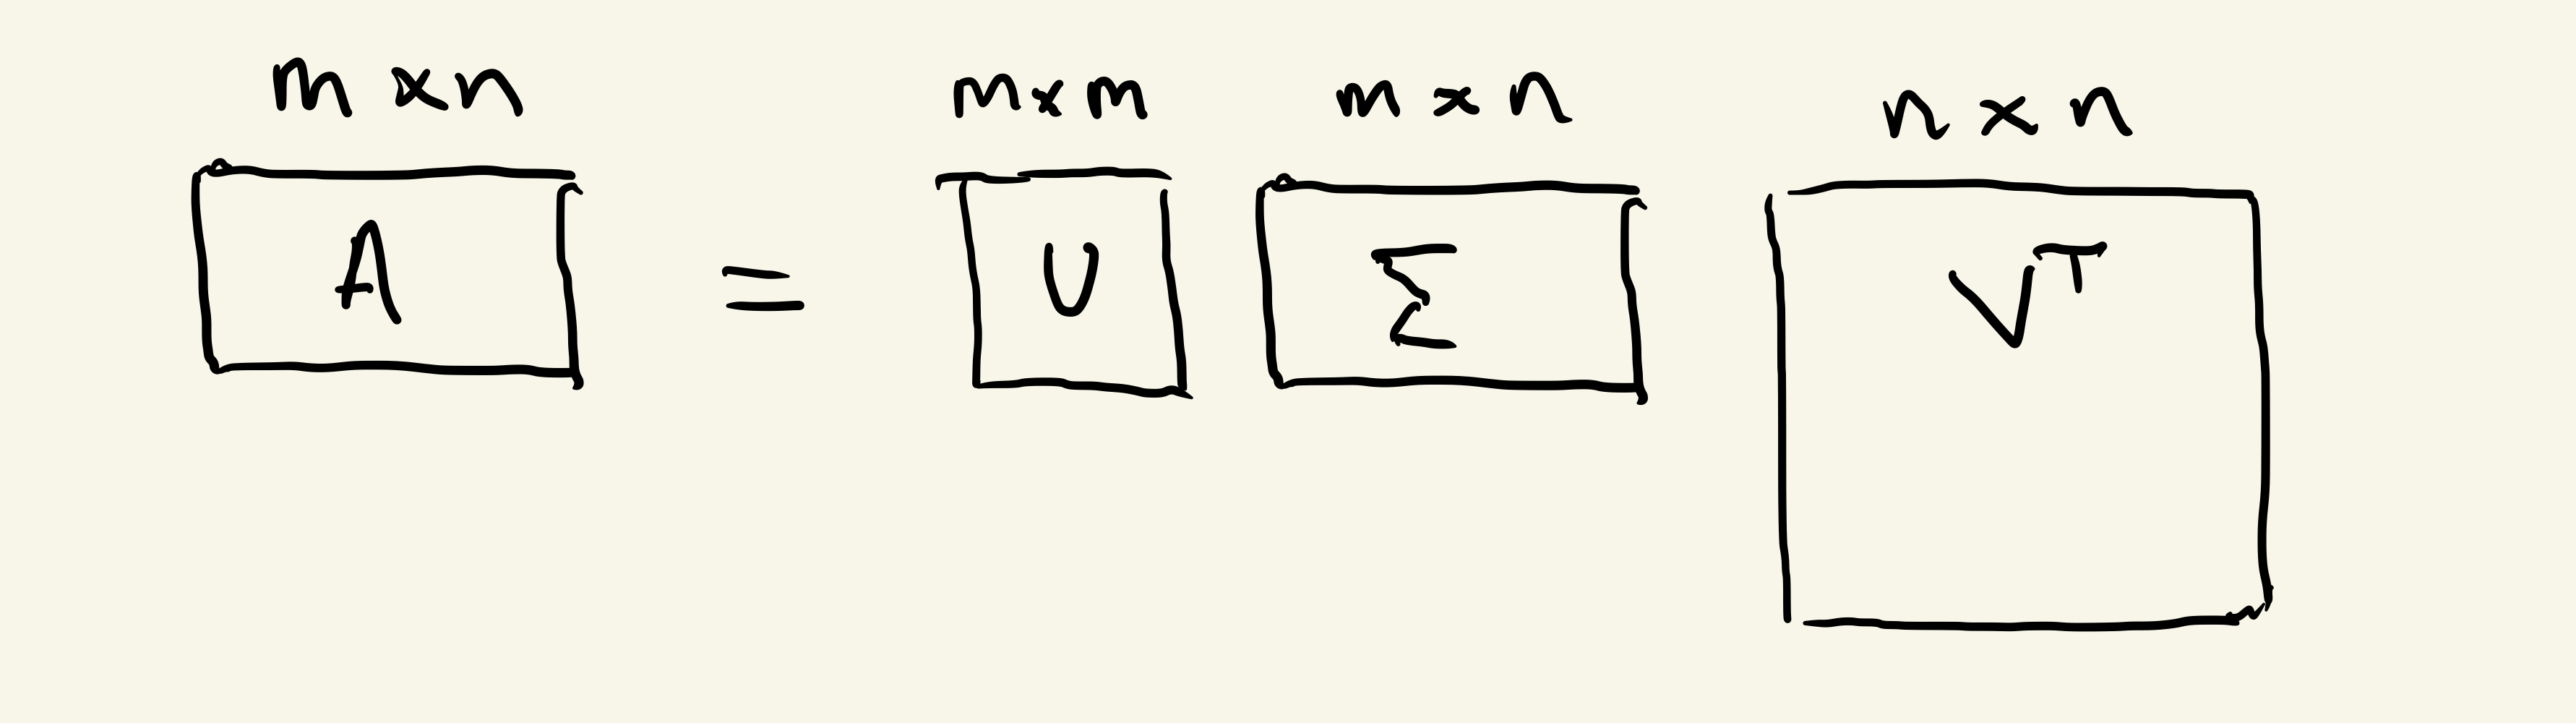

In [117]:
display(Image("images/IMG_D4D3570826C7-1.jpeg", width=650))

Now, let's assume that the number of nonzero singular values $r$ is less than $m$.   

Again, other cases would be similar.

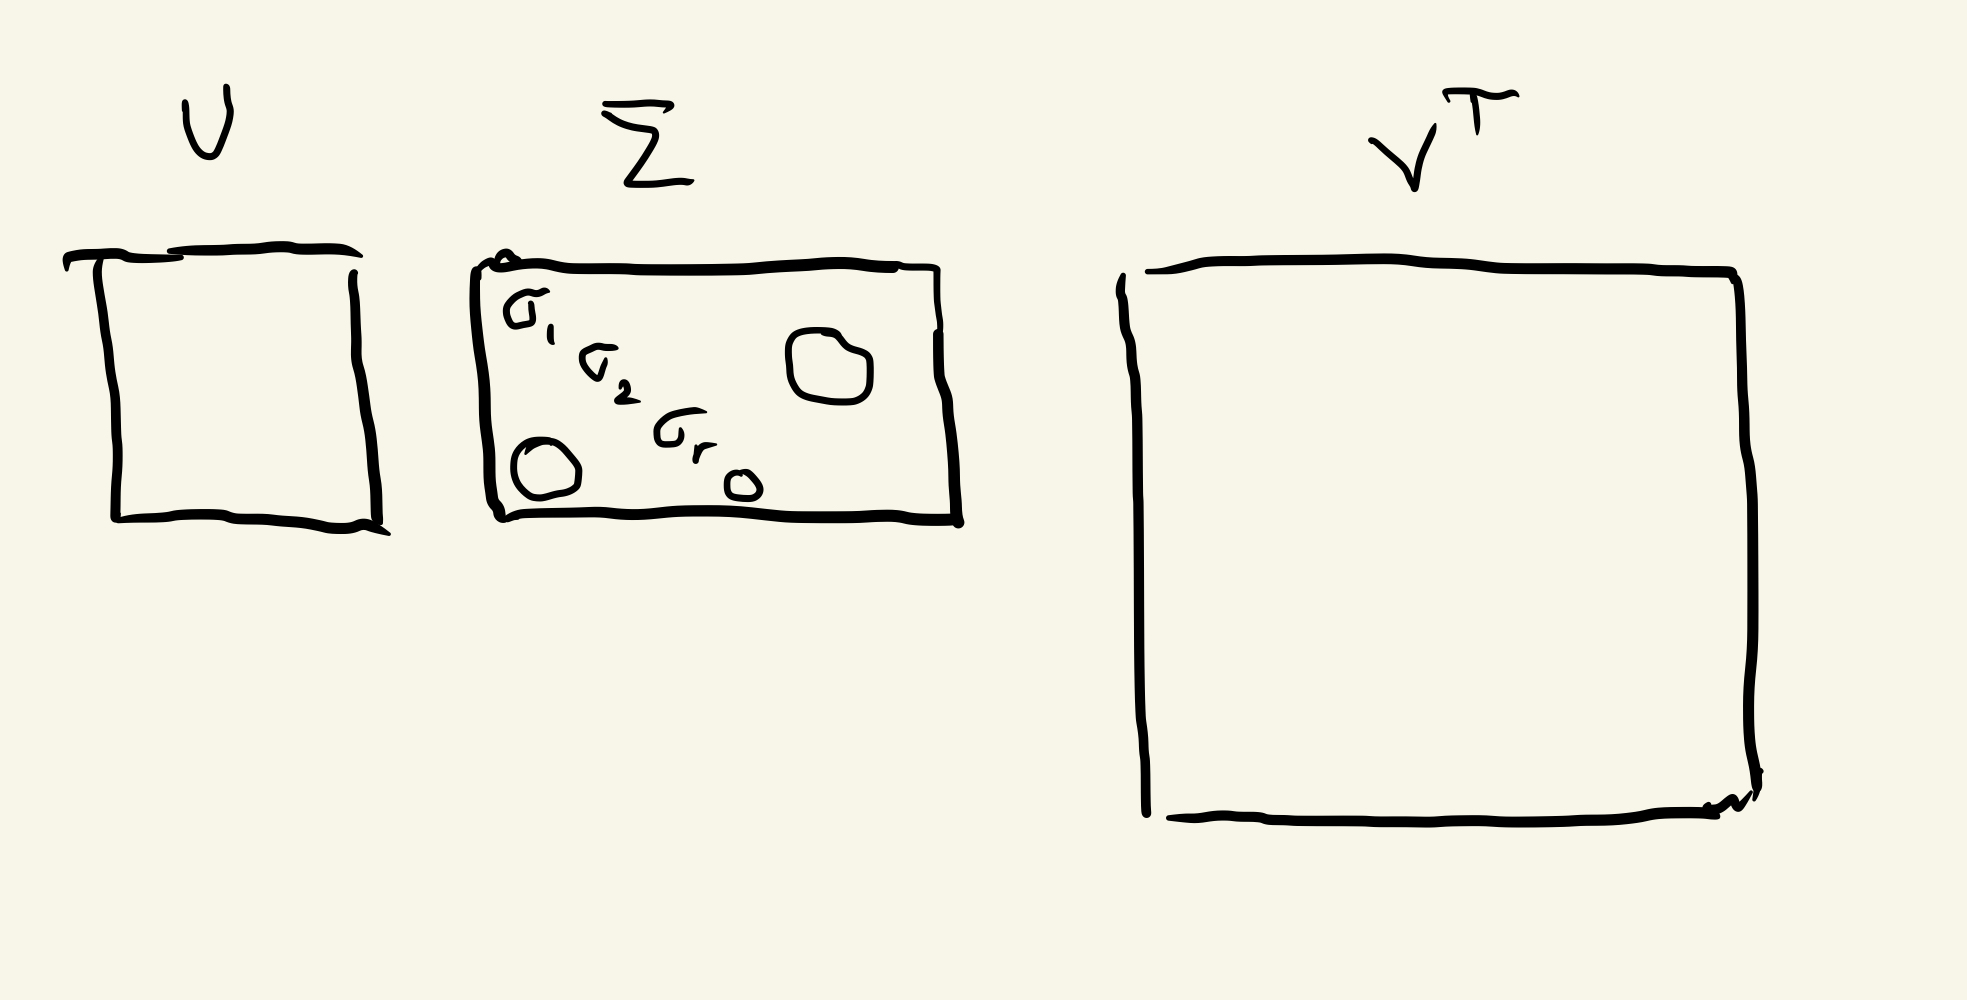

In [118]:
display(Image("images/IMG_9002E2E7AD74-1.jpeg", width=650))

In many cases we are only concerned with representing $A$.   

That is, we don't need $U$ or $V$ to be orthogonal (square) matrices.

Then, to compute $A$, we only need the $r$ leftmost columns of $U$, and the $r$ upper rows of $V^T$.

That's because all the other values on the diagonal of $\Sigma$ are zero, so they don't contribute anything to $A$.

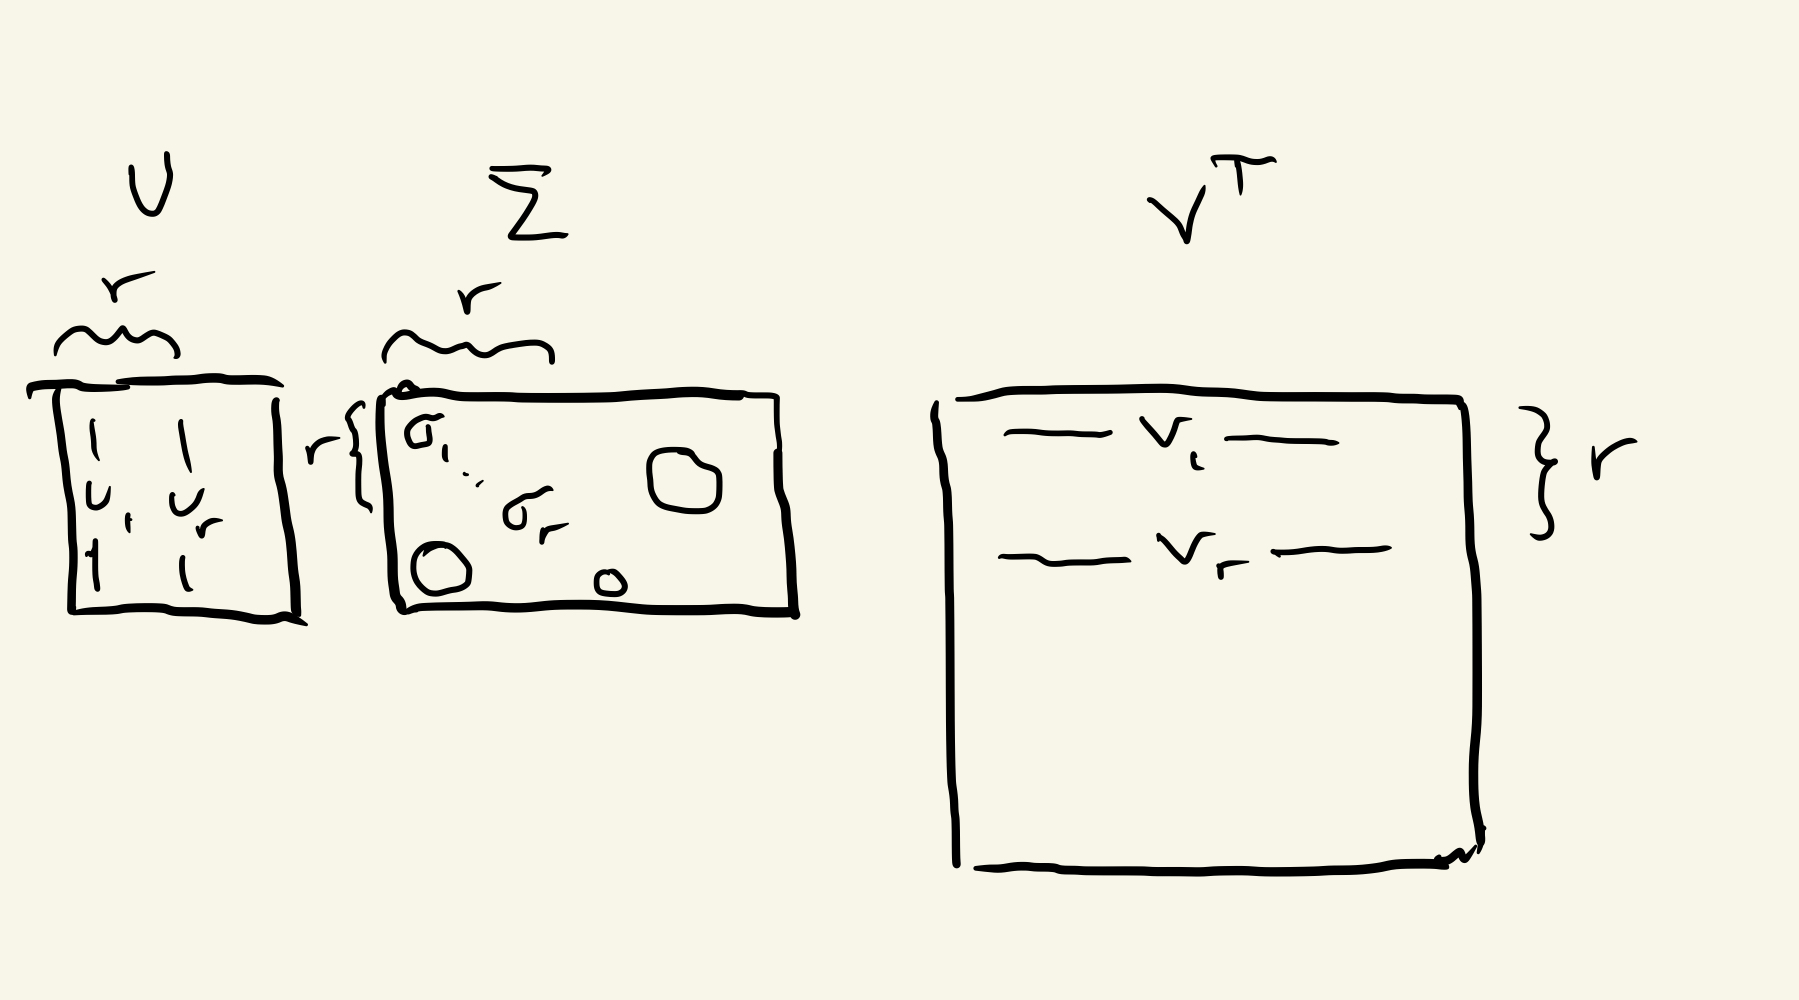

In [119]:
display(Image("images/IMG_3669574F73A7-1.jpeg", width=650))

So we often work with the __reduced SVD__ of $A$:

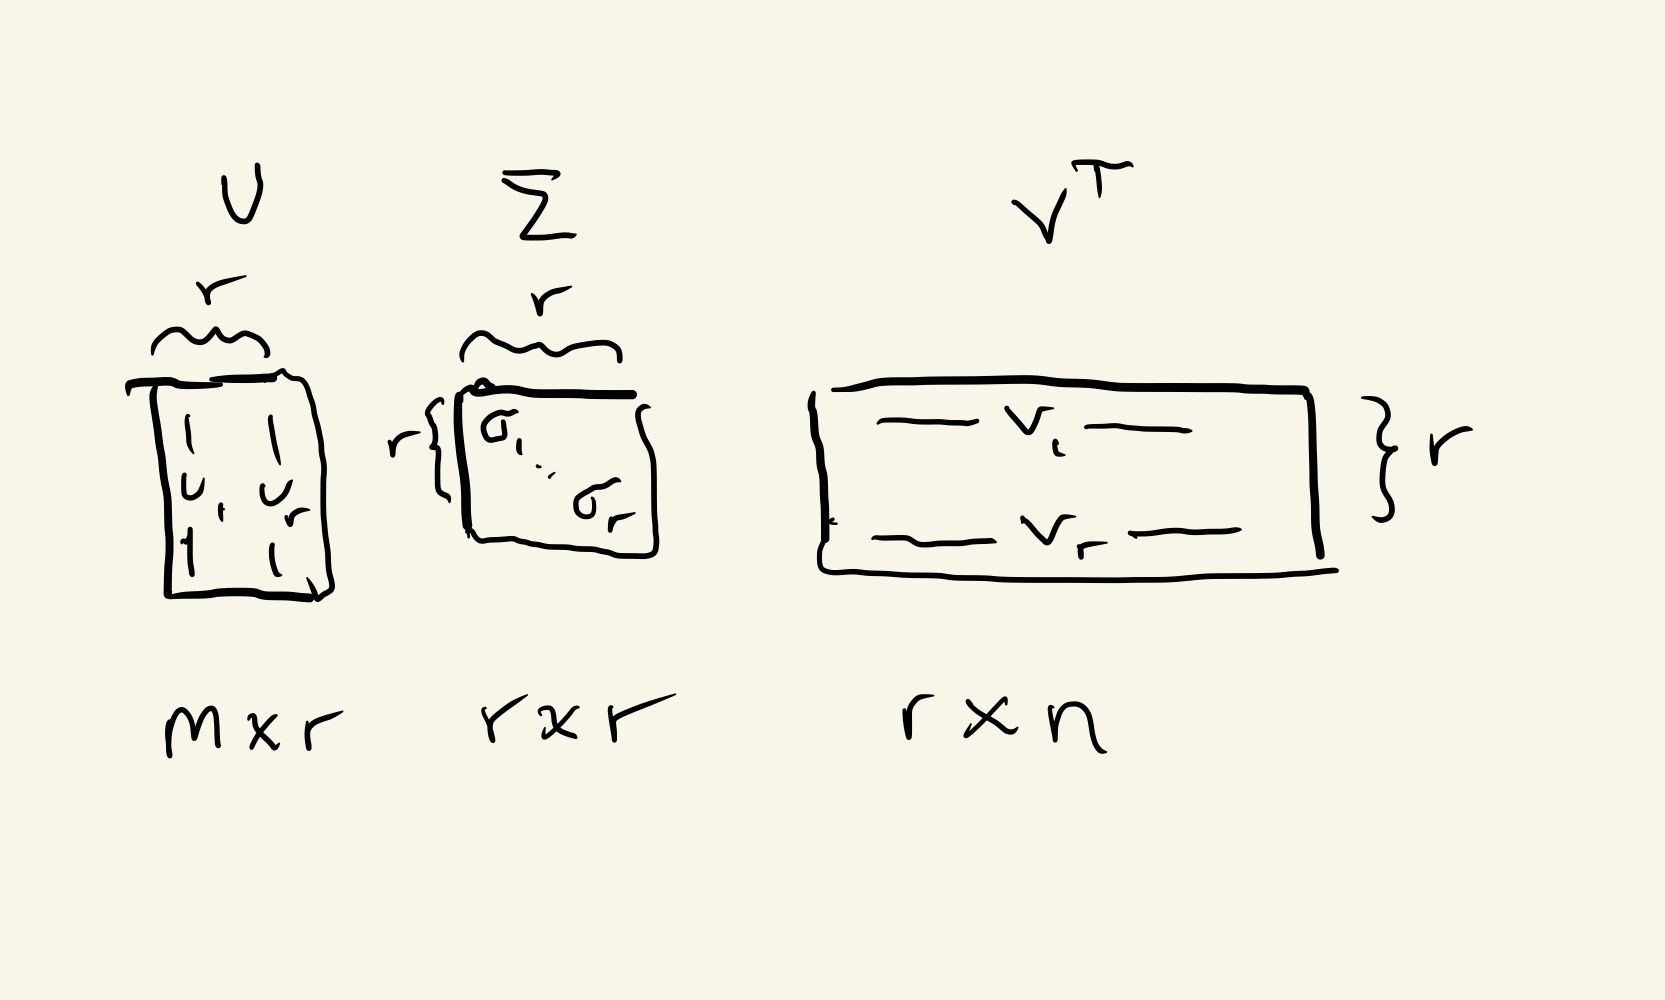

In [120]:
display(Image("images/IMG_9C41CC5F13F5-1.jpeg", width=650))

Note that in the reduced SVD, $\Sigma$ has all nonzero entries on its diagonal, so it can be inverted.

However, we still have that $A = U\Sigma V^T$.

### The Pseudoinverse

Consider the case where we are working with the reduced SVD of $A$:
    
$$A = U\Sigma V^T.$$

In the reduced SVD, $\Sigma$ is invertible (it is a diagonal matrix with all positive entries on the diagonal).

Using this decomposition we can define an important matrix corresponding to $A$.

$$A^+ = V \Sigma^{-1} U^T$$

This matrix $A^+$ is called the __pseudoinverse__ of $A$.

(Sometimes called the Moore-Penrose pseudoinverse).

Obviously, $A$ cannot have an inverse, because it is not even square (let alone invertible) in general.

So why is $A^+$ called the pseudoinverse?

Let's go back to our favorite equation, $A\mathbf{x} = \mathbf{b}$, specifically in the case where there are no solutions.   

In that case, we can find least-squares solutions by finding $\mathbf{\hat{x}}$ such that $A\mathbf{\hat{x}}$ is the projection of $\mathbf{b}$ onto $\operatorname{Col}A$.

And, __if $A^TA$ is invertible,__ that $\mathbf{\hat{x}}$ is given by
$$ \mathbf{\hat{x}} = (A^TA)^{-1}A^T\mathbf{b}$$

But, what if $A^TA$ is not invertible?   

There are still least-square solutions, but now there are an infinite number.   

What if we just want to find __one__ of them?

Let's use the pseudoinverse:

$$\mathbf{\hat{x}} = A^+ \mathbf{b}$$

Then:
    $$A\mathbf{\hat{x}} = AA^+ \mathbf{b}$$


$$ = (U\Sigma V^T)(V\Sigma^{-1}U^T)\mathbf{b}$$

$$ = U\Sigma\Sigma^{-1}U^T\mathbf{b}$$

$$ = UU^T\mathbf{b}$$

Now, $U$ is an orthonormal basis for $\operatorname{Col}A$.

And, $U^T\mathbf{b}$ are the coefficients of the projection of $\mathbf{b}$ onto each column of $U$, since the columns are unit length.

So, $UU^T\mathbf{b}$ is the projection of $\mathbf{b}$ onto $\operatorname{Col}A$.

So, $\mathbf{\hat{x}} = A^+ \mathbf{b}$ is a least squares solution of $A\mathbf{x} = \mathbf{b}$, 

__even when $A^TA$ is not invertible__,

ie, this formula works for __any__ $A$.

Remember, any $A$ has an SVD, and so any $A$ has a pseudoinverse!

## Approximating a Matrix

One way to think of the SVD is that it gives tools for approximating one matrix by another matrix.

To talk about when one matrix "approximates" another, we need a "length" for matrices.  

We will use the __Frobenius norm__ which is just the usual norm, treating the matrix as if it were a vector.

In other words, the definition of the Frobenius norm of $A$, denoted $\Vert A\Vert_F$, is:

$$\Vert A\Vert_F = \sqrt{\sum a_{ij}^2}.$$

The approximations we'll discuss are __low-rank__ approximations.

Recall that the rank of a matrix $A$ is the largest number of linearly independent columns of $A$.

Let's define the __rank-$k$ approximation__ to $A$:

When $k < \rank\ A$, the rank-$k$ approximation to $A$ is the closest rank-$k$ matrix to $A$, i.e., 

$$A^{(k)} =\arg \min_{\rank\ B = k} \Vert A-B\Vert_F.$$

Note that this matrix may take up __much__ less space than the orignal $A$.

$$ \mbox{m}\left\{\begin{array}{c}\;\\\;\\\;\\\;\\\;\end{array}\right.\;\;\overbrace{\left[\begin{array}{cccc}\begin{array}{c}\vdots\\\vdots\\{\bf a_1}\\\vdots\\\vdots\end{array}&\begin{array}{c}\vdots\\\vdots\\{\bf a_2}\\\vdots\\\vdots\end{array}&\dots&\begin{array}{c}\vdots\\\vdots\\{\bf a_n}\\\vdots\\\vdots\end{array}\\\end{array}\right]}^{\mbox{n}} =
\overbrace{\left[\begin{array}{cc}\vdots&\vdots\\\vdots&\vdots\\\sigma_1\mathbf{u}_1&\sigma_k\mathbf{u}_k\\\vdots&\vdots\\\vdots&\vdots\end{array}\right]}^{\large k}
\times
\left[\begin{array}{ccccc}\dots&\dots&\mathbf{v}_1&\dots&\dots\\\dots&\dots&\mathbf{v}_k&\dots&\dots\end{array}\right]$$

The rank-$k$ approximation takes up space $(m+n)k$ while $A$ itself takes space $mn$.

For example, if $k=10$ and $m = n = 1000$, then the rank-$k$ approximation takes space $20000/1000000 = 2\%$ of $A$.

Here is a remarkable fact about the SVD (one of many!):

The best rank-$k$ approximation to any matrix can be found via the SVD.

In fact, for an $m\times n$ matrix $A$, the SVD does two things:

1. It gives the best rank-$k$ approximation to $A$ for __every__ $k$ up to the rank of $A$.
2. It gives the __distance__ of the best rank-$k$ approximation $A^{(k)}$ from $A$ for each $k$.

In terms of the singular value decomposition, 

1)  The best rank-$k$ approximation to $A$ is formed by taking 

   * $U' = $ the $k$ leftmost columns of $U$, 
   * $\Sigma ' = $ the $k\times k$ upper left submatrix of $\Sigma$, and 
   * $V'= $ the $k$ leftmost columns of $V$, and constructing 

$$ A^{(k)} = U'\Sigma'(V')^T.$$

2) The distance (in Frobenius norm) of the best rank-$k$ approximation $A^{(k)}$ from $A$ is equal to $\sqrt{\sum_{i=k+1}^r\sigma^2_i}$.

What this means is that if, beyond some $k$, all of the singular values are small, then $A$ can be closely approximated by a rank-$k$ matrix.   


__Example: signal compression.__

Image data is often  __approximately low-rank.__

For example, here is a photo, which is really a $512\times 512$ matrix:

<IPython.core.display.Javascript object>


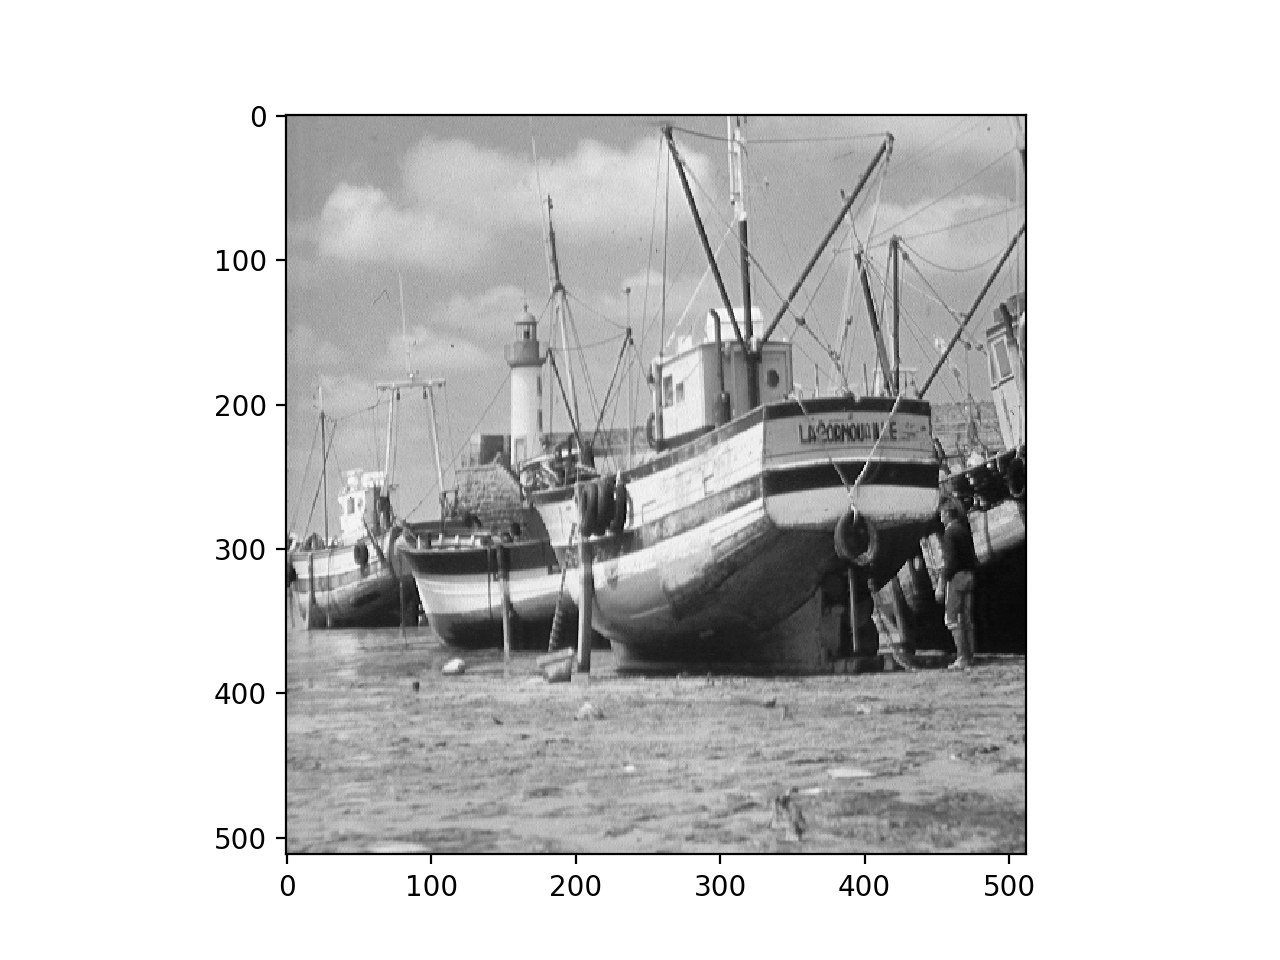

In [82]:
boat = np.loadtxt('data/boat.dat')
import matplotlib.cm as cm
plt.figure()
plt.imshow(boat,cmap = cm.Greys_r);

Let's look at its singular values (often called the matrix's "spectrum"):

<IPython.core.display.Javascript object>


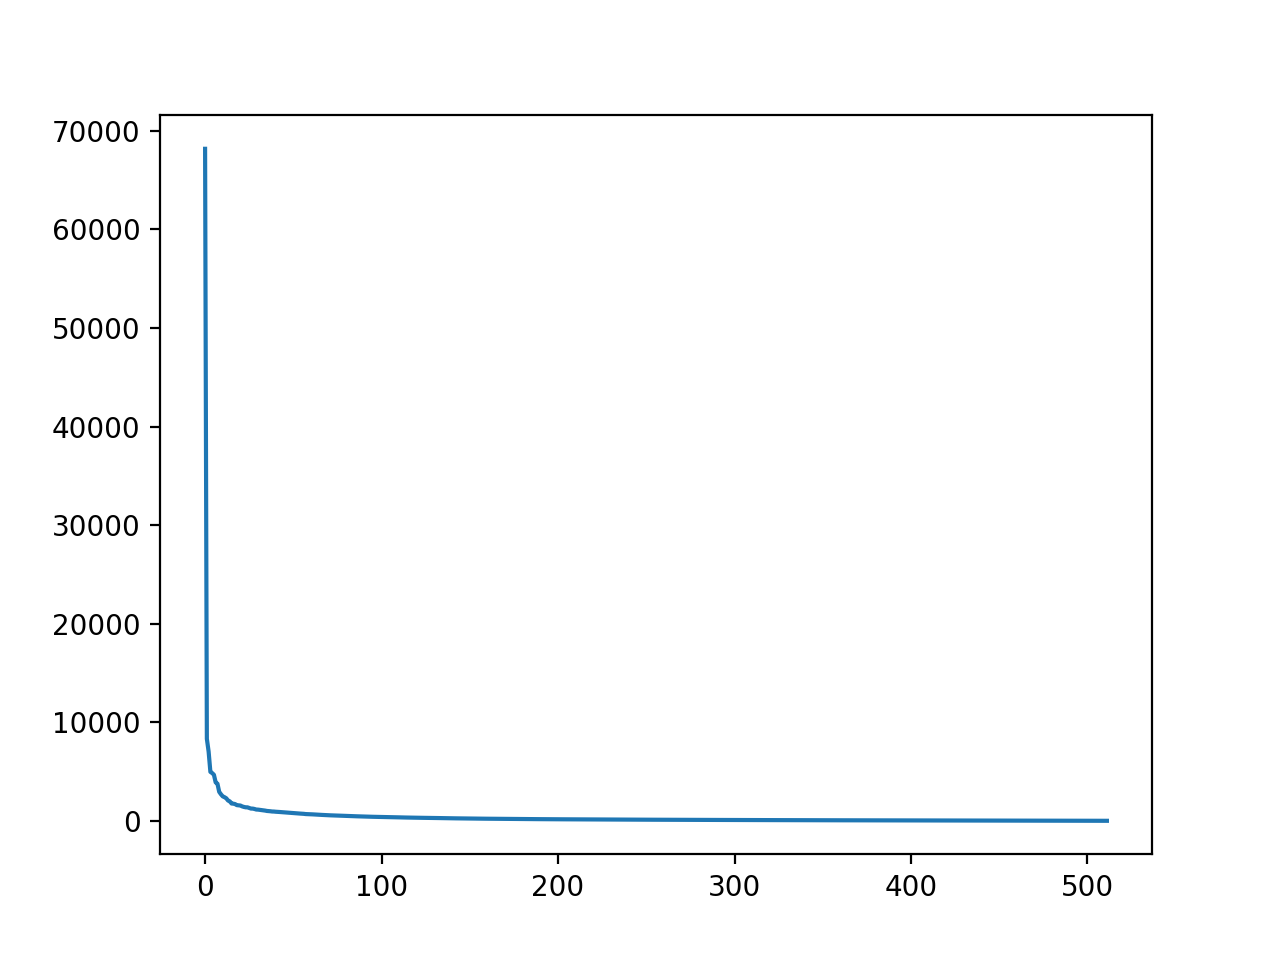

In [83]:
u,s,vt=np.linalg.svd(boat,full_matrices=False)
plt.figure()
plt.plot(s)

<IPython.core.display.Javascript object>


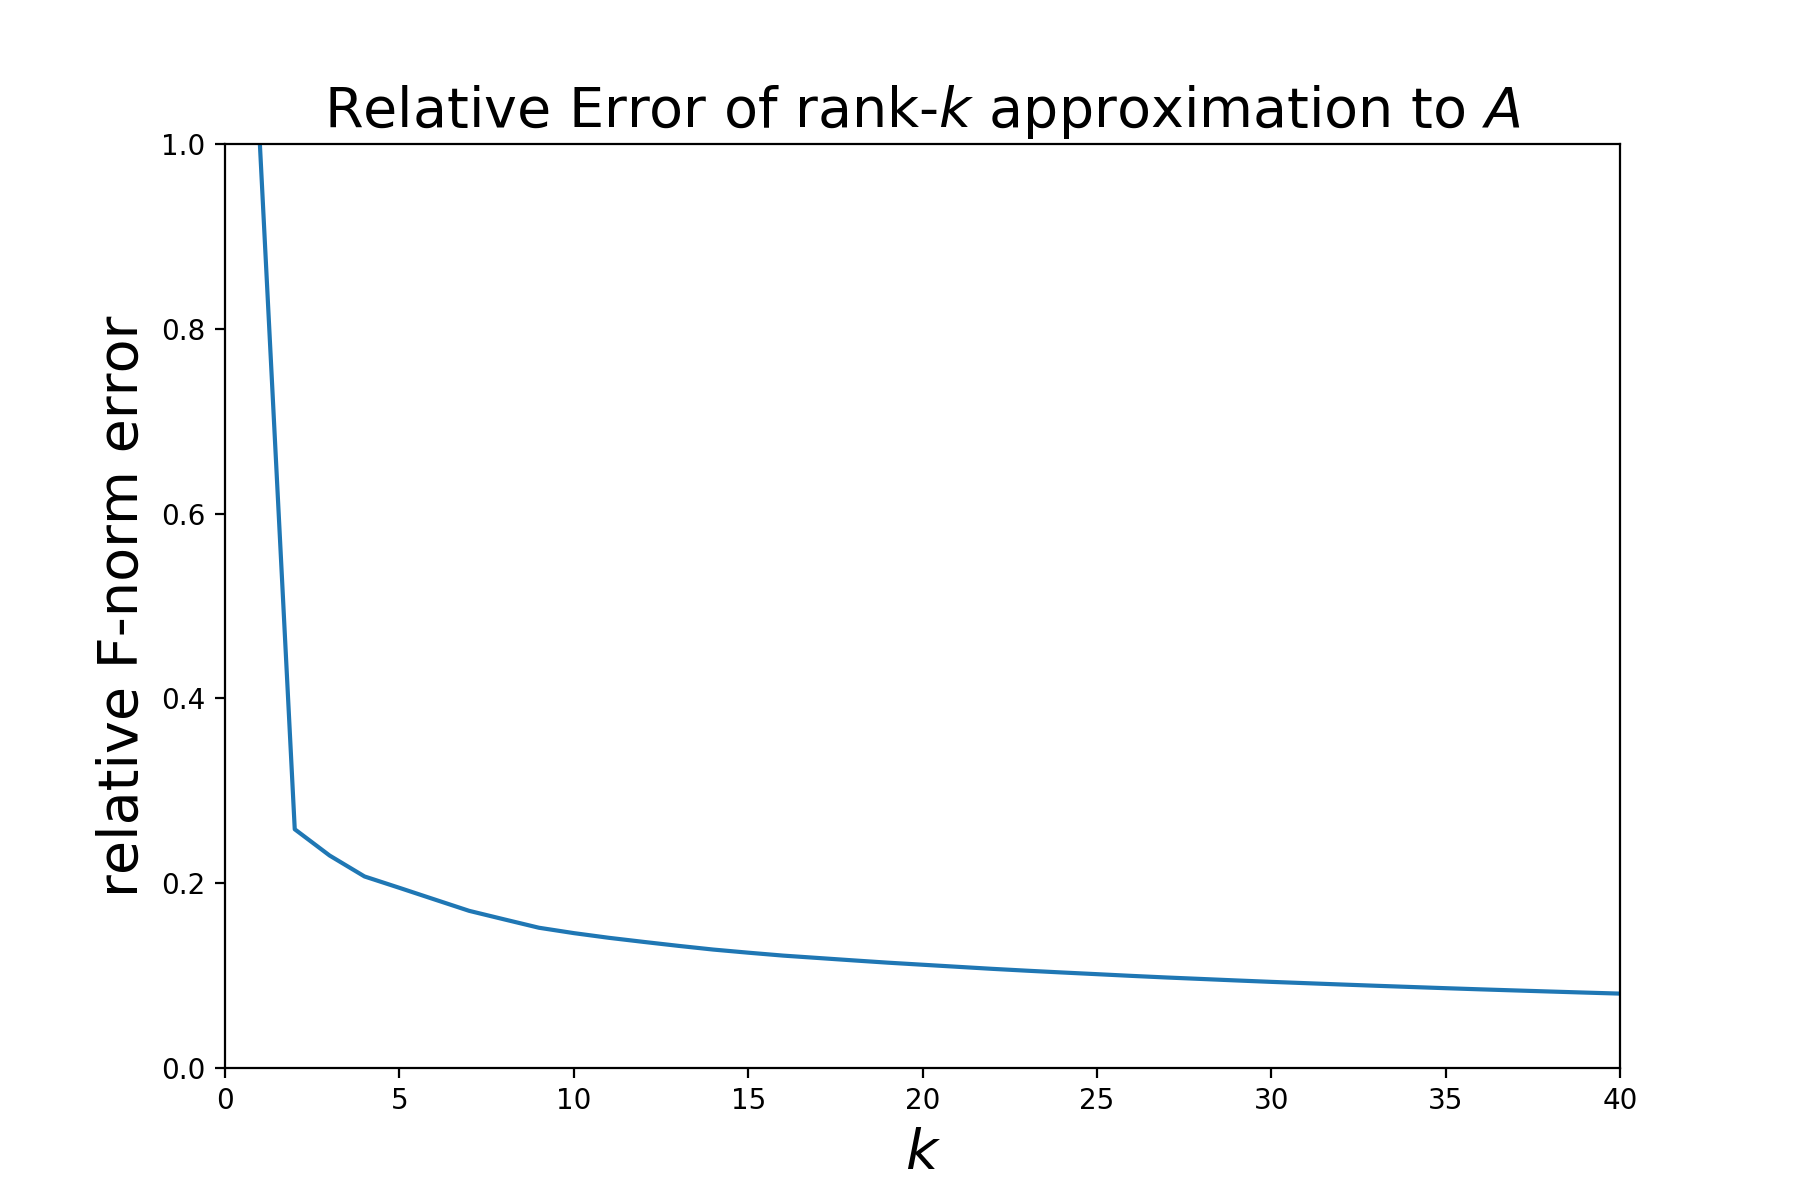

In [84]:
sl.hide_code_in_slideshow()
fig = plt.figure(figsize=(9,6))
Anorm = np.linalg.norm(boat)
err = np.cumsum(s[::-1]**2)
err = np.sqrt(err[::-1])
plt.plot(range(1,41),err[:40]/Anorm)
plt.xlim([0,40])
plt.ylim([0,1])
plt.xlabel(r'$k$',size=20)
plt.ylabel(r'relative F-norm error',size=20)
plt.title(r'Relative Error of rank-$k$ approximation to $A$',size=20);

This matrix has rank of 512.   But its "effective" rank is low, perhaps 40.

Let's find the closest rank-40 matrix and view it.

<IPython.core.display.Javascript object>


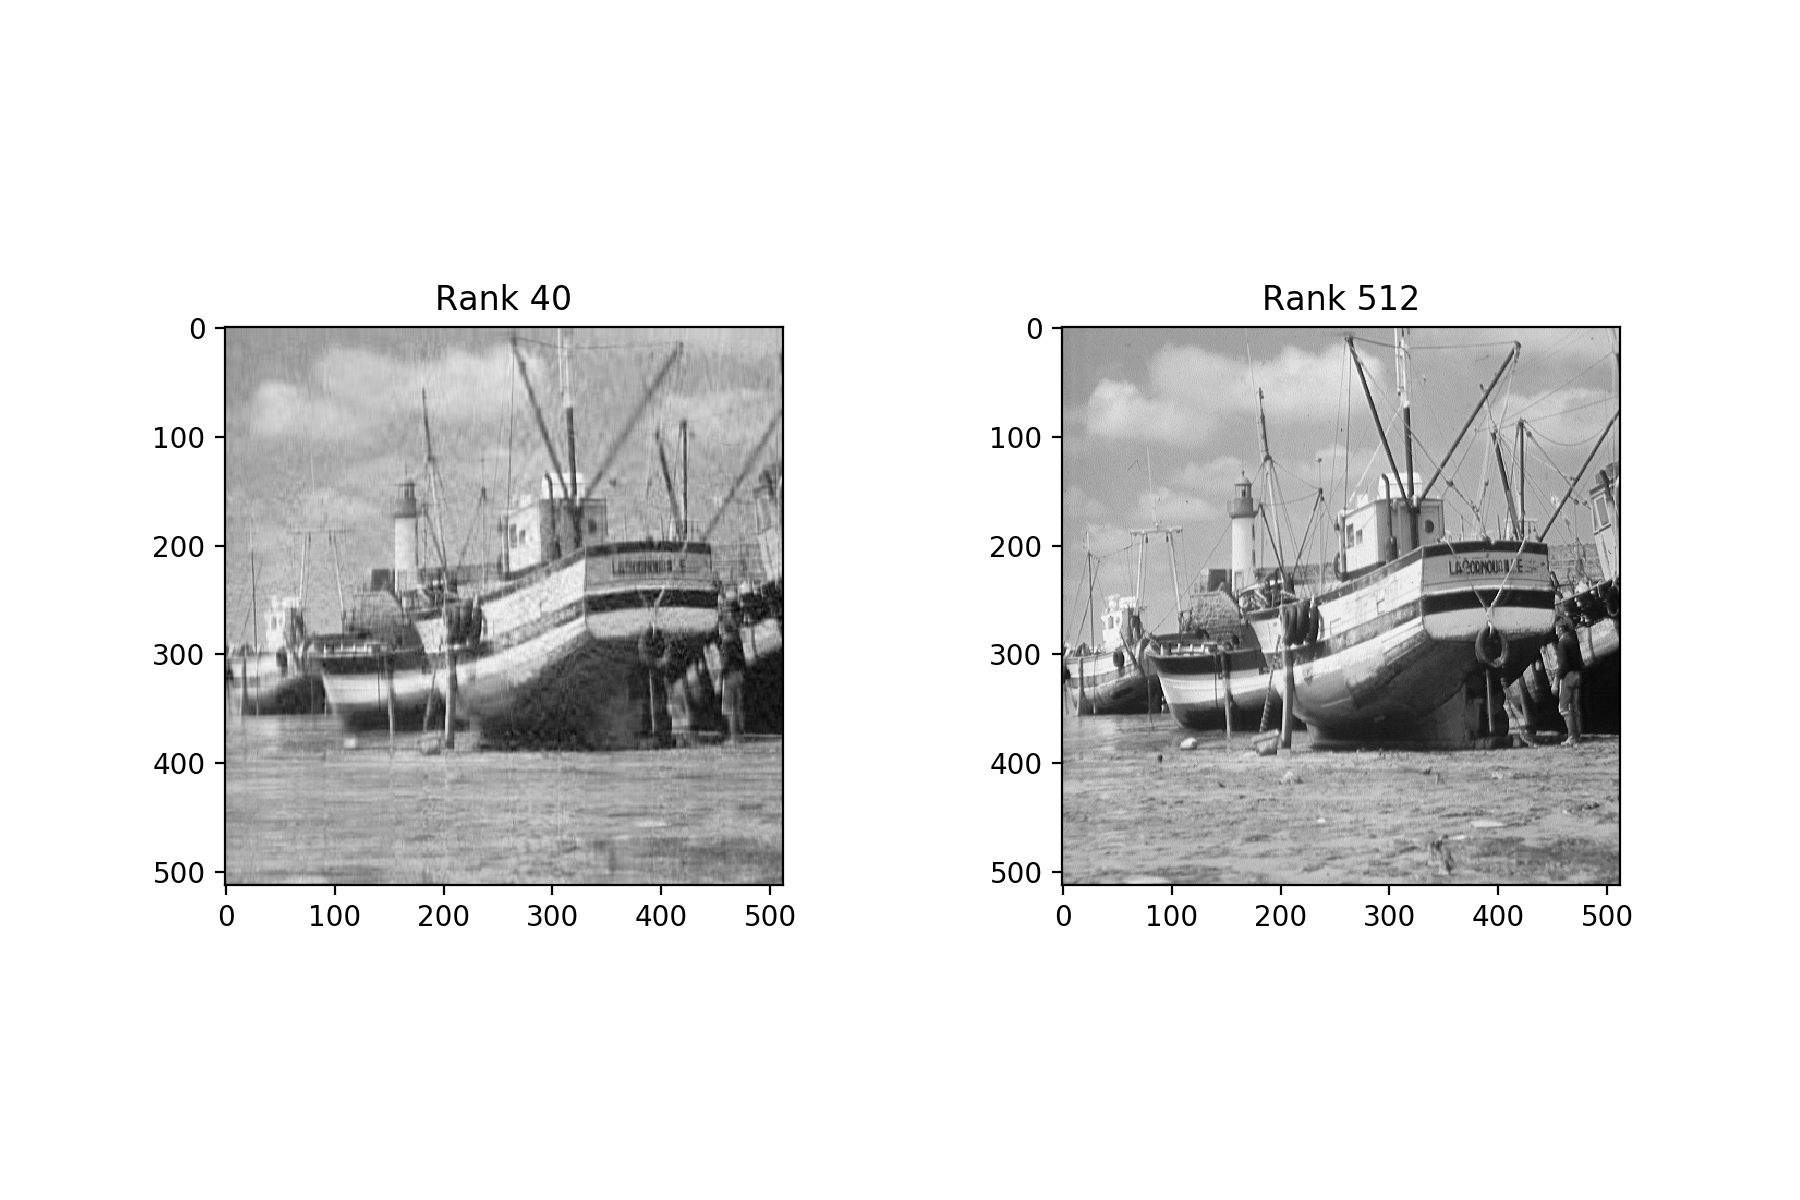

In [85]:
# construct a rank-n version of the boat
scopy = s.copy()
rank = 40
scopy[rank:]=0
boatApprox = u.dot(np.diag(scopy)).dot(vt)
#
plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boatApprox,cmap = cm.Greys_r)
plt.title('Rank {}'.format(rank))
plt.subplot(1,2,2)
plt.imshow(boat,cmap = cm.Greys_r)
plt.title('Rank 512')
plt.subplots_adjust(wspace=0.5);

Note that the rank-40 boat takes up only 40/512 = __8% of the space as the original image!__

This general principle is what makes image, video, and sound compression effective.  

When you watch HDTV, or listen to an MP3, or look at a JPEG image, these signals have been compressed using the fact that they are basically __low-rank__ matrices.

__Example: Pattern extraction.__

Another remarkable feature of the SVD is that it __automatically extracts common patterns__ from a set of data.

Here is an example: data traffic flowing over a network.

We'll look at OD flow traffic on the Abilene network:

<img src='images/Abilene-map.png'>

Source: Internet2, circa 2005

This matrix has 121 columns and 1008 rows.

Its rank is 121.

In [ ]:
sl.hide_code_in_slideshow()
with open('data/odnames','r') as f:
    odnames = [line.strip() for line in f]
dates = pd.date_range('9/1/2003',freq='10min',periods=1008)
Atraf = pd.read_table('data/X',sep='  ',header=None,names=odnames,engine='python')
Atraf.index = dates
plt.figure(figsize=(10,8))
for i in range(1,13):
    ax = plt.subplot(4,3,i)
    plt.plot(Atraf.ix[:,i-1])
    plt.title(odnames[i])
    plt.xlabel('Time')
plt.subplots_adjust(wspace=0.45,hspace=1)
plt.suptitle('Twelve Traffic Traces',size=20)
print('')

Each traffic trace is a column of $A$.

$$ A \approx U'\Sigma'(V')^T $$

In this interpretation, we think of each column of $A$ as a combination of the columns of $U'$.

Let's use as our example $\mathbf{a}_1,$ the first column of $A$.

This happens to be the ATLA-CHIN flow.

The equation above tells us that

$$\mathbf{a}_1 \approx v_{11}\sigma_1\mathbf{u}_1 + v_{12}\sigma_2\mathbf{u}_2 + \dots + v_{1k}\sigma_k\mathbf{u}_k.$$

In other words, $\mathbf{u}_1$ (the first column of $U$) is the "strongest" pattern occurring in $A$, and its strength is measured by $\sigma_1$.

In [ ]:
u,s,vt = np.linalg.svd(Atraf)
fig = plt.figure(figsize=(6,4))
plt.plot(range(1,1+len(s)),s)
plt.xlabel(r'$k$',size=20)
plt.ylabel(r'$\sigma_k$',size=20)
plt.title(r'Singular Values of Traffic Matrix',size=20)
print('')

In [ ]:
plt.figure(figsize=(10,8))
recon = np.zeros((1008))
for i in range(1,17):
    ax = plt.subplot(4,4,i)
    recon = recon + (u[:,i-1] * s[i-1] * vt[i-1,1])
    plt.plot(recon)
    plt.title('{}'.format(i))
    plt.xlabel('Time')
plt.subplots_adjust(wspace=0.45,hspace=1)
plt.suptitle('Twelve Traffic Traces',size=20)
print('')

Here is an view of the first two columns of $U\Sigma$ for the traffic matrix data:

In [ ]:
u,s,vt = np.linalg.svd(Atraf,full_matrices=False)
uframe = pd.DataFrame(u.dot(np.diag(s)),index=pd.date_range('9/1/2003',freq='10min',periods=1008))
uframe[0].plot()
uframe[1].plot()